# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě **(celkem za 4 body)** - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají **(každá míra za 2 body, celkem tedy za 6 bodů)**,
* vytvořte vizualizaci pro alespoň jednu míru centrality **(celkem za 2 body)**.

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

# Základní síťová analýza
## Příprava/Explorace dat

V dokumentaci se dozvíme že hodnota `route_type` nabívá např 1 - metro, 0 - tramvaj, 3 - bus (viz dokumentace GTFS)

In [463]:
import matplotlib.pyplot as plt
import networkx as nx

In [464]:
import pandas as pd
df = pd.read_csv("d.csv")
df.head()

stop_from      stop_from_name    stop_to        stop_to_name depart_from  \
0  U2991Z301             Hněvice     T58005      Hněvice seř.n.     4:53:00   
1     T58005      Hněvice seř.n.  U4610Z301              Záluží     4:54:30   
2  U4610Z301              Záluží  U4609Z301              Dobříň     4:56:00   
3  U4609Z301              Dobříň  U4608Z301  Roudnice nad Labem     4:59:00   
4  U4608Z301  Roudnice nad Labem  U4609Z301              Dobříň     4:36:00   

  arrive_to  route_type  is_night  monday  tuesday  wednesday  thursday  \
0   4:54:30           2         0       1        1          1         1   
1   4:56:00           2         0       1        1          1         1   
2   4:59:00           2         0       1        1          1         1   
3   5:03:00           2         0       1        1          1         1   
4   4:38:00           2         0       1        1          1         1   

   friday  saturday  sunday  
0       1         0       0  
1       1         0       0  
2       1         0       0  
3       1         0       0  
4       1         0       0

Opravíme formáty časů dle zadání.

In [465]:
def format_times(s):
    l = [int(x) for x in s.split(':')]
    if l[0] >= 24 or l[1] >= 24 or l[2] >= 24:
        return f'{l[0] % 24}:{l[1] % 24}:{l[2] % 24}'
    else:
        return s
print("Containing number 24:", len(df['arrive_to'][df['arrive_to'].str.contains("24")]))
df['arrive_to'] = df['arrive_to'].apply(format_times)
df['depart_from'] = df['depart_from'].apply(format_times)
print("Containing number 24:", len(df['arrive_to'][df['arrive_to'].str.contains("24")]))

Containing number 24: 41239
Containing number 24: 0


In [466]:
df.nunique()

stop_from         15178
stop_from_name     7389
stop_to           15154
stop_to_name       7387
depart_from        7352
arrive_to          7269
route_type            6
is_night              2
monday                2
tuesday               2
wednesday             2
thursday              2
friday                2
saturday              2
sunday                2
dtype: int64

Připravíme si data zastávek a analyzujeme

In [467]:
stops = pd.read_csv("stops.txt")
stops.head(5)

stop_id    stop_name   stop_lat   stop_lon zone_id  stop_url  location_type  \
0   U50S1  Budějovická  50.044411  14.448787       P       NaN              1   
1   U52S1       Chodov  50.031672  14.490961       P       NaN              1   
2   U75S1    Kolbenova  50.110395  14.516398       P       NaN              1   
3   U78S1        Ládví  50.126591  14.469451       P       NaN              1   
4  U100S1     Vltavská  50.100298  14.438492       P       NaN              1   

  parent_station  wheelchair_boarding level_id platform_code  asw_node_id  \
0            NaN                    1      NaN           NaN         50.0   
1            NaN                    1      NaN           NaN         52.0   
2            NaN                    1      NaN           NaN         75.0   
3            NaN                    1      NaN           NaN         78.0   
4            NaN                    1      NaN           NaN        100.0   

   asw_stop_id  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [468]:
stops.nunique()

stop_id                16435
stop_name               7547
stop_lat               14833
stop_lon               15387
zone_id                   27
stop_url                   0
location_type              4
parent_station            58
wheelchair_boarding        3
level_id                 171
platform_code             81
asw_node_id             6986
asw_stop_id               63
dtype: int64

Zaujímá nás zde `stop_late`, `stop_lon`, `stop_name`, (technicky i `zone_id` by se dala hezky využít).

In [469]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16435 entries, 0 to 16434
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              16435 non-null  object 
 1   stop_name            15936 non-null  object 
 2   stop_lat             16435 non-null  float64
 3   stop_lon             16435 non-null  float64
 4   zone_id              15408 non-null  object 
 5   stop_url             0 non-null      float64
 6   location_type        16435 non-null  int64  
 7   parent_station       954 non-null    object 
 8   wheelchair_boarding  16435 non-null  int64  
 9   level_id             954 non-null    object 
 10  platform_code        14750 non-null  object 
 11  asw_node_id          15748 non-null  float64
 12  asw_stop_id          15354 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.6+ MB


Zajímavost, že stop_url je vždy null.

Vytvoříme pole typů pro přehlednost (kódy Viz (GTFS) dokumentace).

In [470]:
TYPES = {"metro": 1, "tram": 0, "train":2, "bus": 3}

## Vizualizaci sítě **(celkem za 4 body)** (Tramvajová)

Pro tuto úlohu vizualizujeme tramvajové zastávky

### Příprava dat

Vyfiltrujeme dataset na pouze tramvajové zastávky.

In [471]:
trams_prague = df[df["route_type"] == TYPES["tram"]]
tram_from = list(trams_prague["stop_from_name"])
tram_to = list(trams_prague["stop_to_name"])

print(tram_from[:5])
print((set(tram_from)).__len__())
print((set(tram_from) | set(tram_to)).__len__())

['Vozovna Motol', 'Motol', 'Krematorium Motol', 'Hlušičkova', 'Slánská']
281
281


Budeme vizualizovat 281 vrcholů/zastávek. Je zde i vidět, že množina `tram_to` je podmnožina množiny `tram_from`, tedy můžeme `tram_from` užít na tvorbu vrcholů v grafu.

Získáme zeměpisnou lokaci zastávek a převedeme to `dict` formátu.

In [472]:
tram_stops = stops[(stops["location_type"] == TYPES["tram"])]
tram_pos = tram_stops[["stop_name", "stop_lat", "stop_lon"]]
tram_pos = {name: (lon, lat) for name, lat, lon in tram_pos.values}


print(list(tram_pos.keys())[:10])
print(tram_pos.__len__())

['Boletická', 'Břetislavka', 'Arbesovo náměstí', 'Nové Vokovice', 'Dolnokřeslická', 'Baba I', 'Baba II', 'Násirovo náměstí', 'Balabenka', 'Balkán']
7396


### Zobrazení

Pro zobrazení využijeme modulu `networknx`. Využijeme `tram_from` na tvorbu vrcholů, a využijeme `zip` funkci na tvorbu hran.

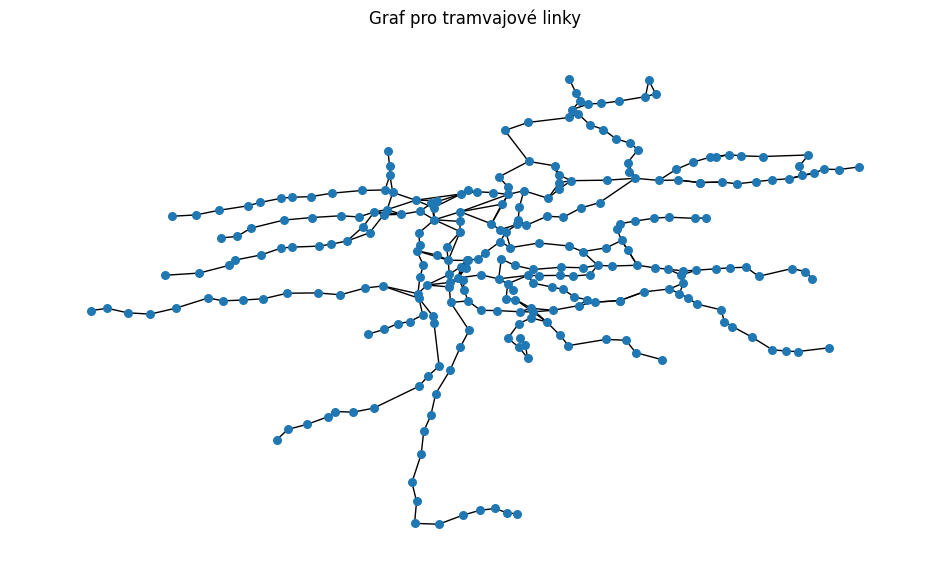

In [473]:
G = nx.Graph()
G.add_nodes_from(tram_from, type="stop")
G.add_edges_from(zip(tram_from, tram_to), type="direct")

fig, ax = plt.subplots(figsize=(12, 7))

nx.draw(G, pos=tram_pos, node_size=30)

plt.title("Graf pro tramvajové linky")
plt.show()


Je zde vidět, že graf je více propojen ve středu, na krajích mají vrcholý spíše stupěň 2 nebo 1. To si ještě podrobněji prozkoumáme. 

## Míra centrality - analýza důležitosti zastávek (pondělí - neděle)

Využijeme informace o tramvajích z předchozího úkolu. Zobrazíme si top 3 zastávky s největší centralitou (Stupňová centralita, Centralite blízkosti, Centralita mezilehlosti)

In [474]:
# Prepare graph
G = nx.Graph()
G.add_nodes_from(set(tram_from) | set(tram_to), type="stop")
G.add_edges_from(zip(tram_from, tram_to), type="direct")

# Sort dictionaries in descrending order
degree_c = dict(sorted(nx.degree_centrality(G).items(), key=lambda item: item[1])[::-1])
closeness_c = dict(sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1])[::-1])
betweenness_c = dict(sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1])[::-1])

# Print top three items in dict
print("Stupňová centralita:      ", *list(degree_c.items())[:3])
print("Centralita blízkosti:     ", *list(closeness_c.items())[:3])
print("Centralita mezilehlosti:  ", *list(betweenness_c.items())[:3])

Stupňová centralita:       ('Karlovo náměstí', 0.02857142857142857) ('Malostranská', 0.024999999999999998) ('Národní divadlo', 0.02142857142857143)
Centralita blízkosti:      ('Malostranská', 0.09978617248752673) ('Národní divadlo', 0.09887005649717515) ('Staroměstská', 0.09855684618092221)
Centralita mezilehlosti:   ('Malostranská', 0.3480734046860339) ('Národní divadlo', 0.32212186367096785) ('Staroměstská', 0.30876356874009253)


Můžeme vidět že v celtralitě blízkosti a mezilehlosti je na prvním místě **Malonstranská** tramvajová zastávka. Naopak ve stupňové centralitě vede **Karlovo Námestí**, ale hned za nim na druhém místě **Malostranská** zastávka.

Například pro stupňovou centralitu můžeme říct, že **Karlovo Námestí** má nejvíce spojů.

### Vizualizace pro Centralitu blízkosti

Využijeme `matplotlib.cm`, který nám pomůže pro tvorbu barevného grafu. Centralitu blízkosti zobrazíme na grafu.

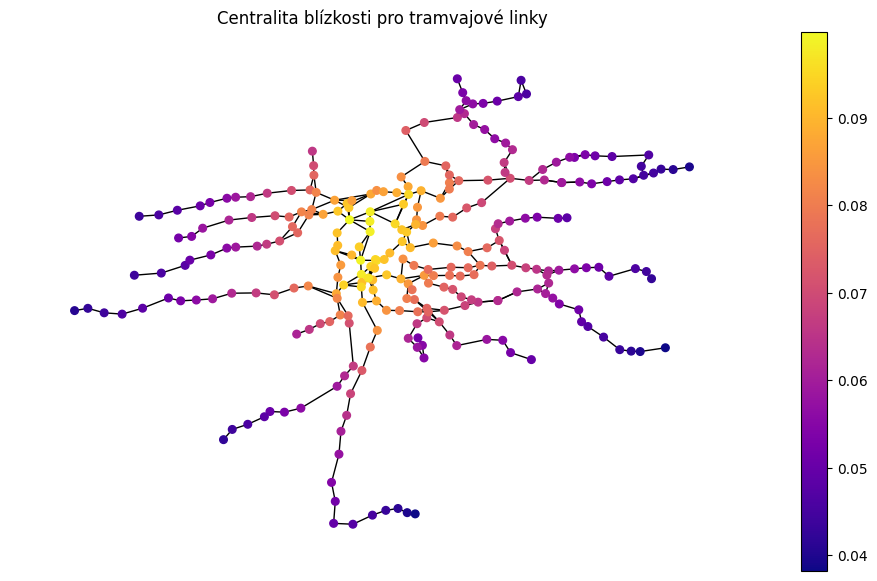

In [475]:
fig, ax = plt.subplots(figsize=(12, 7))

node_colors = list(nx.closeness_centrality(G).values())
nx.draw(G, pos=tram_pos, node_size=30, node_color=node_colors, cmap = plt.cm.plasma)

sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin =min(node_colors), vmax=max(node_colors)))
sm._A = []
plt.colorbar(sm)
plt.title("Centralita blízkosti pro tramvajové linky")
plt.show()


# Vlastní otázky

## 1: 3 Míry centralit pro každý den v týdnu (tramvaj) 

Jaké rozdíly můžeme najít mezi určitými dny v týdnu?

### Příprava dat

Znovu se koukneme na prvních 5 záznamů.

In [476]:
df.head()

stop_from      stop_from_name    stop_to        stop_to_name depart_from  \
0  U2991Z301             Hněvice     T58005      Hněvice seř.n.       4:5:0   
1     T58005      Hněvice seř.n.  U4610Z301              Záluží       4:6:6   
2  U4610Z301              Záluží  U4609Z301              Dobříň       4:8:0   
3  U4609Z301              Dobříň  U4608Z301  Roudnice nad Labem      4:11:0   
4  U4608Z301  Roudnice nad Labem  U4609Z301              Dobříň      4:12:0   

  arrive_to  route_type  is_night  monday  tuesday  wednesday  thursday  \
0     4:6:6           2         0       1        1          1         1   
1     4:8:0           2         0       1        1          1         1   
2    4:11:0           2         0       1        1          1         1   
3   5:03:00           2         0       1        1          1         1   
4    4:14:0           2         0       1        1          1         1   

   friday  saturday  sunday  
0       1         0       0  
1       1         0       0  
2       1         0       0  
3       1         0       0  
4       1         0       0

Vytvoříme list listů spojů pro každý den v týdnu. 

In [477]:
# {0:"monday", 1:"tuesday", 2:"wednesday", 3:"thursday", 4:"friday", 5:"saturday", 6:"sunday"}
week = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
trams_prague = df[df["route_type"] == TYPES["tram"]]
week_trams_from = [list( trams_prague[trams_prague[k] == 1]["stop_from_name"] ) for k in week]
week_trams_to =   [list( trams_prague[trams_prague[k] == 1]["stop_to_name"] ) for k in week]


### Zobrazení informací

Vytvoříme 7 grafů, pomocí modulu `networkx`. U každého si vypočítáme 3 míry centrality. A následně zobrazíme zastávku s největší centralitou zvoleného typu.

In [478]:
week_tram_G = [nx.Graph() for _ in  week]
week_centrality = [_ for _ in  week]

# calculate our centralities
for i, G in enumerate(week_tram_G):
    G.add_nodes_from(week_trams_from[i], type="stop")
    G.add_edges_from(zip(week_trams_from[i], week_trams_to[i]), type="direct")

    week_centrality[i] = {
        "Stupňová centralita grafu": nx.degree_centrality(G),
        "Centralita mezilehlosti": nx.betweenness_centrality(G),
        "Centralita blízkosti": nx.closeness_centrality(G),    
    }


# finally print our centralities 
for c_index, name in enumerate(week_centrality[0].keys()):
    print("-"*10,name)
    for i in range(len(week)):
        print("", week[i].title())

        # sort by values descending
        c = week_centrality[i][name]
        c = dict(sorted(c.items(), key=lambda item: item[1])[::-1] )

        # print centrality
        for k,v in list(c.items())[:1]:
            print("", "", f"{k}, {v:.6}")

---------- Stupňová centralita grafu
 Monday
  Malostranská, 0.0250896
 Tuesday
  Malostranská, 0.0250896
 Wednesday
  Malostranská, 0.0250896
 Thursday
  Malostranská, 0.0250896
 Friday
  Malostranská, 0.0250896
 Saturday
  Karlovo náměstí, 0.0255474
 Sunday
  Karlovo náměstí, 0.0290909
---------- Centralita mezilehlosti
 Monday
  Malostranská, 0.348675
 Tuesday
  Malostranská, 0.348675
 Wednesday
  Malostranská, 0.348675
 Thursday
  Malostranská, 0.348675
 Friday
  Malostranská, 0.348675
 Saturday
  Malostranská, 0.356346
 Sunday
  Malostranská, 0.355649
---------- Centralita blízkosti
 Monday
  Malostranská, 0.0997141
 Tuesday
  Malostranská, 0.0997141
 Wednesday
  Malostranská, 0.0997141
 Thursday
  Malostranská, 0.0997141
 Friday
  Malostranská, 0.0997141
 Saturday
  Malostranská, 0.0984903
 Sunday
  Malostranská, 0.0985663


To je zajímavé, vypadá to že nám vyšel stejný výsledek pro Pondělí až Pátek. Pojďme se na to blíž podívat.

In [479]:
for i in range(len(week)):
    print(week[i].title(), len(week_trams_from[i]))

Monday 422257
Tuesday 422257
Wednesday 422257
Thursday 422257
Friday 422257
Saturday 128916
Sunday 146838


I počty zastávek pro pondělí až pátek sedí. Sobota a neděle zatím vypadá že se od všech liší.

Pojdmě ještě porovnat rovnost subdatasetů.

In [480]:
mon = trams_prague[trams_prague["monday"] == 1]
tue = trams_prague[trams_prague["tuesday"] == 1]
wen = trams_prague[trams_prague["wednesday"] == 1]
thu = trams_prague[trams_prague["thursday"] == 1]
fri = trams_prague[trams_prague["friday"] == 1]
sat = trams_prague[trams_prague["saturday"] == 1]
sun = trams_prague[trams_prague["sunday"] == 1]
mon.reset_index()
tue.reset_index()
wen.reset_index()
thu.reset_index()
fri.reset_index()
sat.reset_index()
sun.reset_index()

print(mon.equals(tue))
print(mon.equals(wen))
print(mon.equals(thu))
print(mon.equals(fri))
print(mon.equals(sat))
print(sat.equals(sun))


True
True
True
True
False
False


Tedy pondělí až pátek jezdí tramvaje stejně, pak sobota a neděle jezdí jinak.

## 2: Zobrazení Centrality vážených počtů hran

Jak je na tom centralita vážených počtů hran v pondělí a neděli? Zajímá nás propojenost vrcholů (zastávek). Zobrazíme si je vedle sebe ve dvou grafech.


### Příprava dat

Vybereme pouze pondělí a neděli a vytvoříme příslušné grafy.

In [481]:
# Pick out only trams
tram_stops = stops[(stops["location_type"] == TYPES["tram"])]
# Get positions
tram_pos = tram_stops[["stop_name", "stop_lat", "stop_lon"]]
tram_pos = {name: (lon, lat) for name, lat, lon in tram_pos.values }


# Create two graphs
G = nx.Graph()
day_of_the_week1 = week.index("monday")
G.add_nodes_from(set(week_trams_from[day_of_the_week1]) | set(week_trams_to[day_of_the_week1]), type="stop")
G.add_edges_from(zip(week_trams_from[day_of_the_week1], week_trams_to[day_of_the_week1]), type="direct")

G2 = nx.Graph()
day_of_the_week2 = week.index("sunday")
G2.add_nodes_from(set(week_trams_from[day_of_the_week2]) | set(week_trams_to[day_of_the_week2]), type="stop")
G2.add_edges_from(zip(week_trams_from[day_of_the_week2], week_trams_to[day_of_the_week2]), type="direct")

### Zobrazení

Do `matplotlib.subplots` vložíme argument `ncols=2` který nám místo jedné *axis* vrátí 2. Spočteme centrality a obarvíme příslušné grafy. Následně bhodně pojmenujeme grafy.

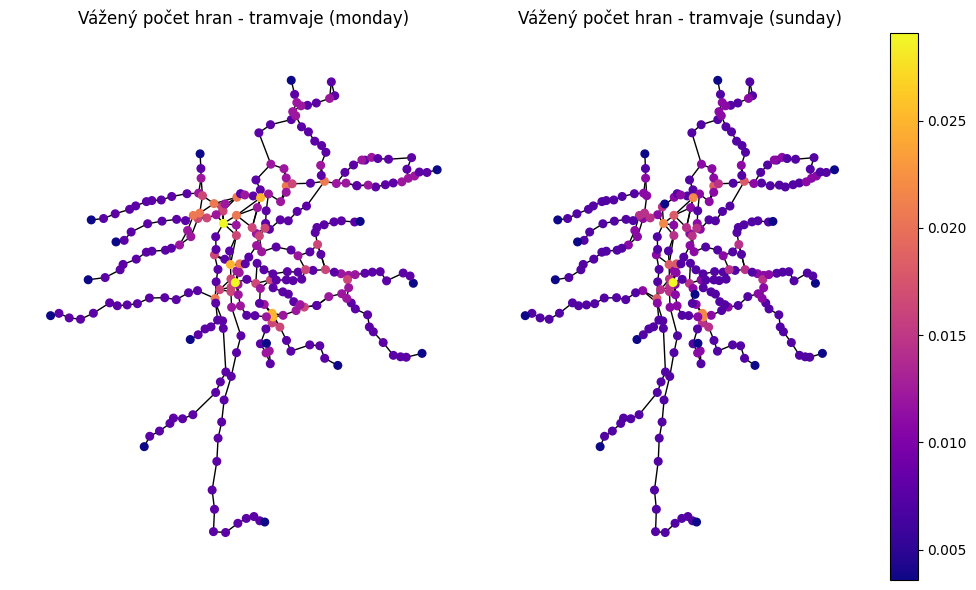

In [482]:
# Create 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax1=axes[0]
ax2=axes[1]


# Generate list of centralities for both graphs
node_colors1 = list(nx.degree_centrality(G).values())
nx.draw(G, pos=tram_pos, node_size=30, node_color=node_colors1, cmap = plt.cm.plasma, ax=ax1)

node_colors2 = list(nx.degree_centrality(G2).values())
nx.draw(G2, pos=tram_pos, node_size=30, node_color=node_colors2, cmap = plt.cm.plasma, ax=ax2)

# Show the centrality bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin =min(node_colors1 + node_colors2), vmax=max(node_colors1 + node_colors2)))
sm._A = []
plt.colorbar(sm)

# Adjust graph settings
ax1.set_axis_off()
ax2.set_axis_off()
ax1.set_title(f"Vážený počet hran - tramvaje ({week[day_of_the_week1]})")
ax2.set_title(f"Vážený počet hran - tramvaje ({week[day_of_the_week2]})")
fig.tight_layout()
plt.show() 


Muzeme si všimnout, že v neděli jsou stanice méně propojené.

## 3: Rozdíl ve frekvenci spojů mezi denními a nočními tramvajemi

Jaký je rozdíl ve frekvenci spojů mezi denními a nočními tramvajemi? Využijeme průhlednost hran.

### Příprava dat

Rozdělíme si data set na noční a denní dle `is_night` atributu. A dále spočítáme počet spojů mezi zastávkami.

In [483]:
tram = df[df["route_type"] == TYPES["tram"]]
_tram_day = tram[tram["is_night"] == 0]
_tram_night = tram[tram["is_night"] == 1]

# Converts df's to lists
tram_day = [list(_tram_day["stop_from_name"]), list(_tram_day["stop_to_name"])]
tram_night = [list(_tram_night["stop_from_name"]), list(_tram_night["stop_to_name"])]


# Creates counts of connectinos between stops
day_count = _tram_day.groupby(['stop_from_name', 'stop_to_name']).size()
night_count = _tram_night.groupby(['stop_from_name', 'stop_to_name']).size()
day_count = day_count.reset_index()
day_count = day_count[['stop_from_name', 'stop_to_name', 0]]
day_count = list(day_count[0])
night_count = night_count.reset_index()
night_count = night_count[['stop_from_name', 'stop_to_name', 0]]
night_count = list(night_count[0])

Vytvoříme si graf a a zapojíme parametr počtů spojení.

In [484]:
# Create two graphs with w attr
G1 = nx.Graph()
G1.add_nodes_from(tram_day[0], type="stop")
G1.add_edges_from(zip(tram_day[0], tram_day[1]), w=day_count, type="direct")
G2 = nx.Graph()
G2.add_nodes_from(tram_night[0], type="stop")
G2.add_edges_from(zip(tram_night[0], tram_night[1]), w=night_count, type="direct")

# Uses the w parameter
_,weights = zip(*nx.get_edge_attributes(G1,'w').items())
_day_weights = weights[0]
_,weights = zip(*nx.get_edge_attributes(G2,'w').items())
_night_weights = weights[0]

# Set width of edge corresponding to the weight linearly
day_widths = [(x)/(max(_day_weights))*4 for x in _day_weights]
night_widths = [(x)/(max(_night_weights))*4 for x in _night_weights]

### Zobrazení

Zobrazíme si graf s váhami hran, které jsme si připravili. Pro lepší viditelnost vybereme pár vrcholů, u kterých zobrazíme název zastávky.

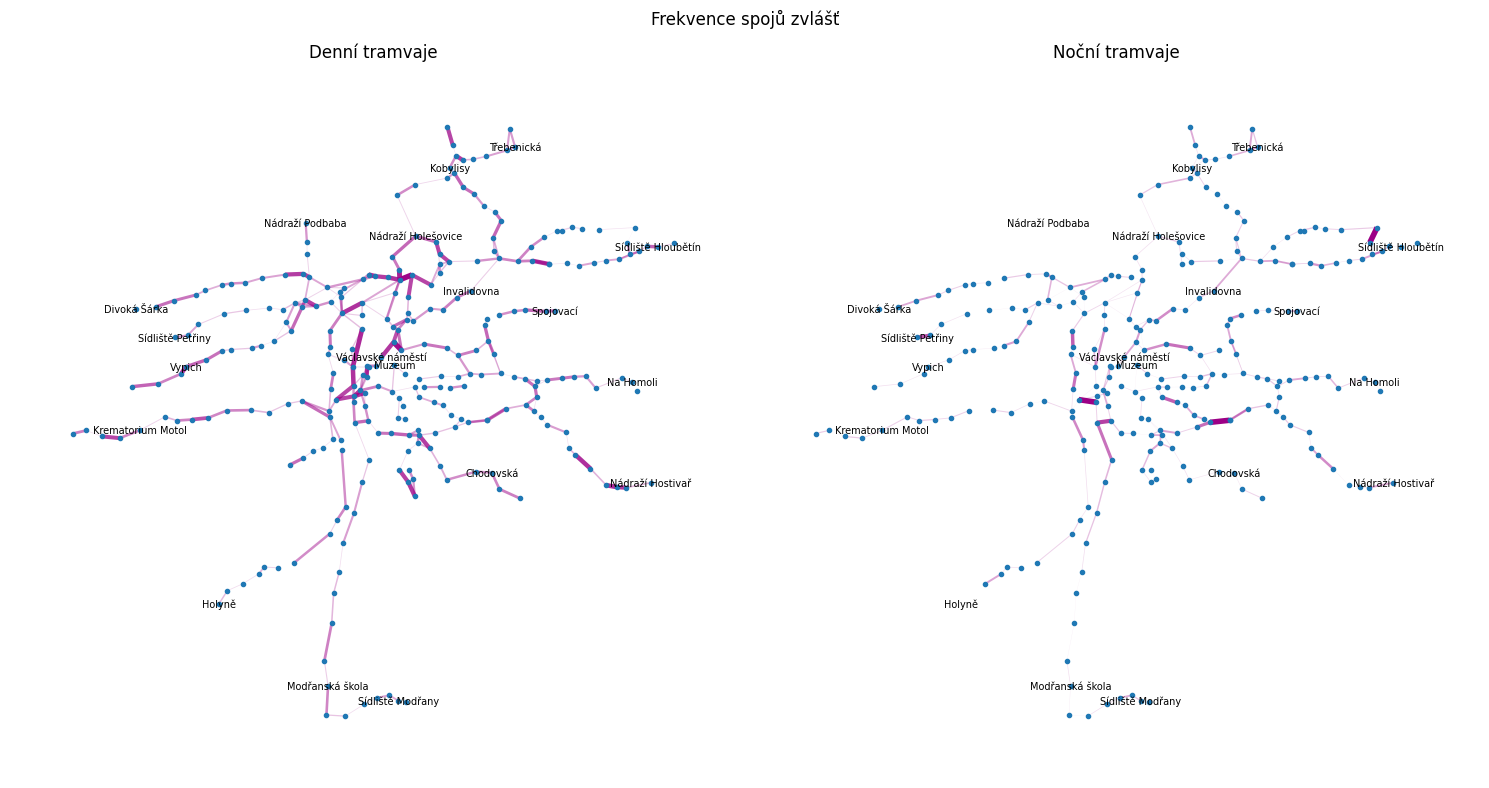

In [485]:
# Set edge transparency of color linearly
day_weights   = [(100,0,122,x/(max(_day_weights))) for x in _day_weights]
night_weights = [(100,0,122,x/(max(_night_weights))) for x in _night_weights]

# Create 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Picking specific labels that I'd like to show
labels=[
"Divoká Šárka",
"Nádraží Podbaba",
"Vypich",
"Holyně",
"Nádraží Hostivař",
"Invalidovna",
"Sídliště Petřiny",
"Nádraží Holešovice",
"Muzeum",
"Modřanská škola",
"Sídliště Modřany",
"Chodovská",
"Sídliště Hloubětín",
"Na Homoli",
"Václavské náměstí",
"Krematorium Motol",
"Kobylisy",
"Třebenická",
"Spojovací"
]
labels = {x:x for x in labels} # converts to format for networkx

# Draws graphs
nx.draw(G1, pos=tram_pos, edge_color=day_weights,  labels=labels, font_size=7, width=day_widths,   node_size=9, ax=ax1)
nx.draw(G2, pos=tram_pos, edge_color=night_weights,labels=labels, font_size=7, width=night_widths, node_size=9, ax=ax2)

# Adjust graph settings
ax1.set_title(f"Denní tramvaje")
ax2.set_title(f"Noční tramvaje")
fig.suptitle("Frekvence spojů zvlášť")
fig.tight_layout()
plt.show() 

Je zde vidět, že hrany jsou více sité (méně neprůhledné) spíše ve středu. Ale nemůžeme si tu dva grafy mezi sebou porovnat.

### Zobrazení aby byli dva grafy lépe porovnatelné mezi sebou

Využijeme logaritmickou stupnici u *alpha channelu* barev.

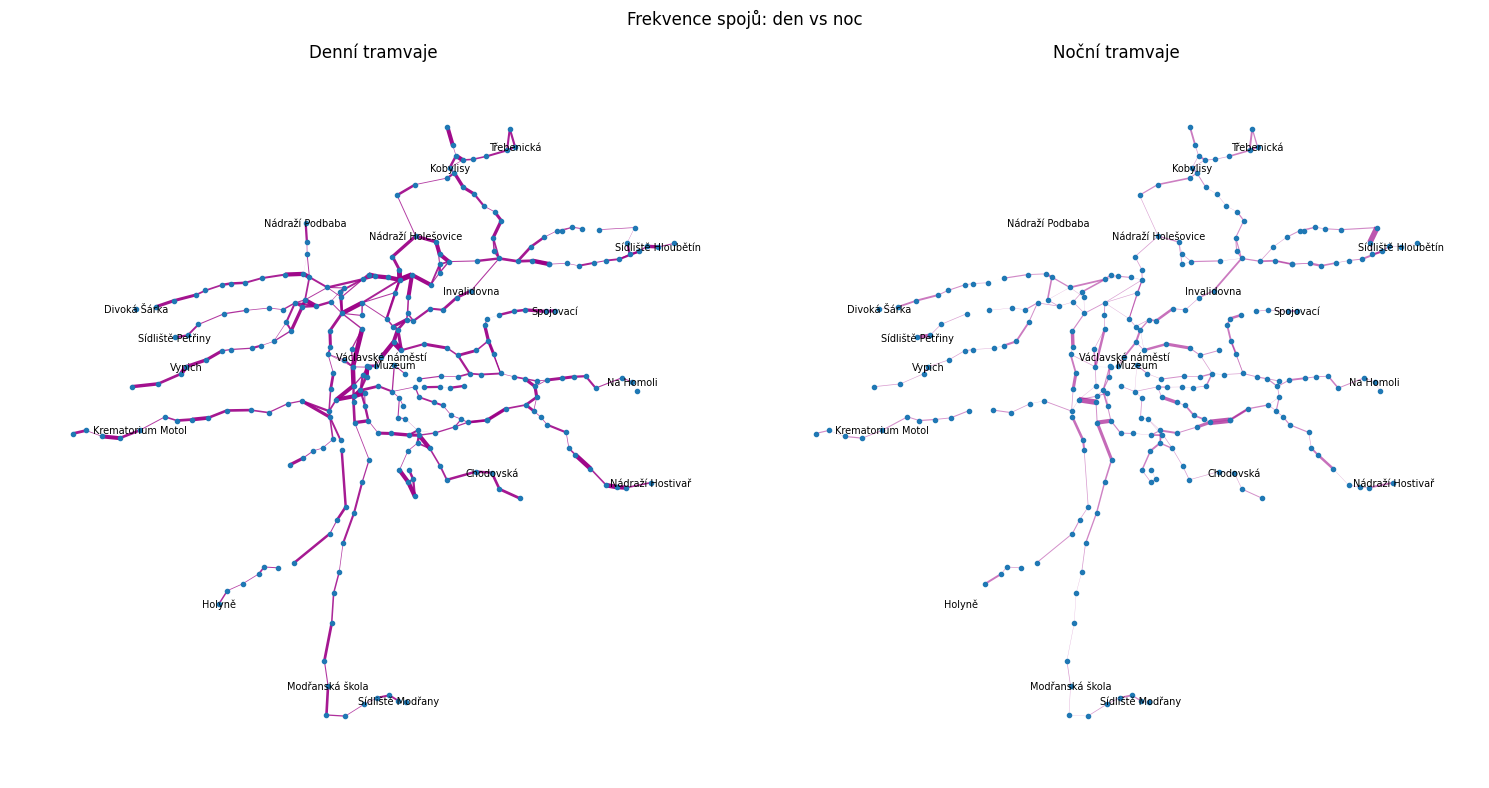

In [486]:
from math import log

# Set transparency of edge color logarithmically
maximum = max(max(_day_weights), max(_night_weights))
day_weights   = [(100,0,122,log(x)/log(maximum)) for x in _day_weights]
night_weights = [(100,0,122,log(x)/log(maximum)) for x  in _night_weights]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Draws graphs
nx.draw(G1, pos=tram_pos, edge_color=day_weights,  labels=labels, font_size=7, width=day_widths,   node_size=9, ax=ax1)
nx.draw(G2, pos=tram_pos, edge_color=night_weights,labels=labels, font_size=7, width=night_widths, node_size=9, ax=ax2)

# Adjust graph settings
ax1.set_title(f"Denní tramvaje")
ax2.set_title(f"Noční tramvaje")
fig.suptitle("Frekvence spojů: den vs noc")
fig.tight_layout()
plt.show() 

Barva už zde více odpovídá, teď se dají grafy mezi sebou porovnávat. Díky logaritmické stupinici si můžeme všimnout, že zde jsou silnější spoje, které byly slabší v předchozím grafu.

## 4: Zobraz graf metra (navíc)

### Příprava

In [487]:
metro = df[df["route_type"] == TYPES["metro"]]
metro.head()

stop_from stop_from_name    stop_to       stop_to_name depart_from  \
1534591  U1071Z101P  Depo Hostivař  U953Z102P             Skalka      6:14:2   
1534592   U953Z102P         Skalka  U713Z102P         Strašnická     6:17:15   
1534593   U713Z102P     Strašnická  U921Z102P         Želivského      6:19:2   
1534594   U921Z102P     Želivského  U118Z102P              Flora      6:21:2   
1534595   U118Z102P          Flora  U209Z102P  Jiřího z Poděbrad      6:23:1   

        arrive_to  route_type  is_night  monday  tuesday  wednesday  thursday  \
1534591   6:16:21           1         0       1        1          1         1   
1534592   6:19:20           1         0       1        1          1         1   
1534593   6:21:20           1         0       1        1          1         1   
1534594   6:23:05           1         0       1        1          1         1   
1534595    6:0:11           1         0       1        1          1         1   

         friday  saturday  sunday  
1534591       1         0       0  
1534592       1         0       0  
1534593       1         0       0  
1534594       1         0       0  
1534595       1         0       0

Vybereme od a do.

In [488]:
metro_stops_from = list(metro["stop_from_name"])
metro_stops_to = list(metro["stop_to_name"])

print(metro_stops_from[:5], metro_stops_to[:5], sep="\n")

['Depo Hostivař', 'Skalka', 'Strašnická', 'Želivského', 'Flora']
['Skalka', 'Strašnická', 'Želivského', 'Flora', 'Jiřího z Poděbrad']


Získáme lokace zastávek metra z proměnné `stops` a vhodně převedeme na typ `dict`.

In [489]:
metro_stops = stops[stops["location_type"] == TYPES["metro"]]
metro_pos = metro_stops[["stop_name", "stop_lat", "stop_lon"]]
metro_pos = {name: (lon, lat) for name, lat, lon in metro_pos.values}
list(metro_pos.items())[:5]

[('Budějovická', (14.448787, 50.044411)),
 ('Chodov', (14.490961, 50.031672)),
 ('Kolbenova', (14.516398, 50.110395)),
 ('Ládví', (14.469451, 50.126591)),
 ('Vltavská', (14.438492, 50.100298))]

Vytvoříme náš graf. Set `metro_stops_from` a `metro_stops_to` bude identický jelikož se jedná o metro.

In [490]:
G = nx.Graph()
G.add_nodes_from(metro_stops_from, type="stop")
list(G.nodes())[:5]

['Depo Hostivař', 'Skalka', 'Strašnická', 'Želivského', 'Flora']

Přidáme hrany a zobrazíme argument.

In [491]:
G.add_edges_from(zip(metro_stops_from, metro_stops_to), type="direct")
list(zip(metro_stops_from, metro_stops_to))[:5]

[('Depo Hostivař', 'Skalka'),
 ('Skalka', 'Strašnická'),
 ('Strašnická', 'Želivského'),
 ('Želivského', 'Flora'),
 ('Flora', 'Jiřího z Poděbrad')]

### Zobrazení

Zde bude lepší, když názvy stanic posuneme nahoru, využijeme k tomu *python comprehension*.

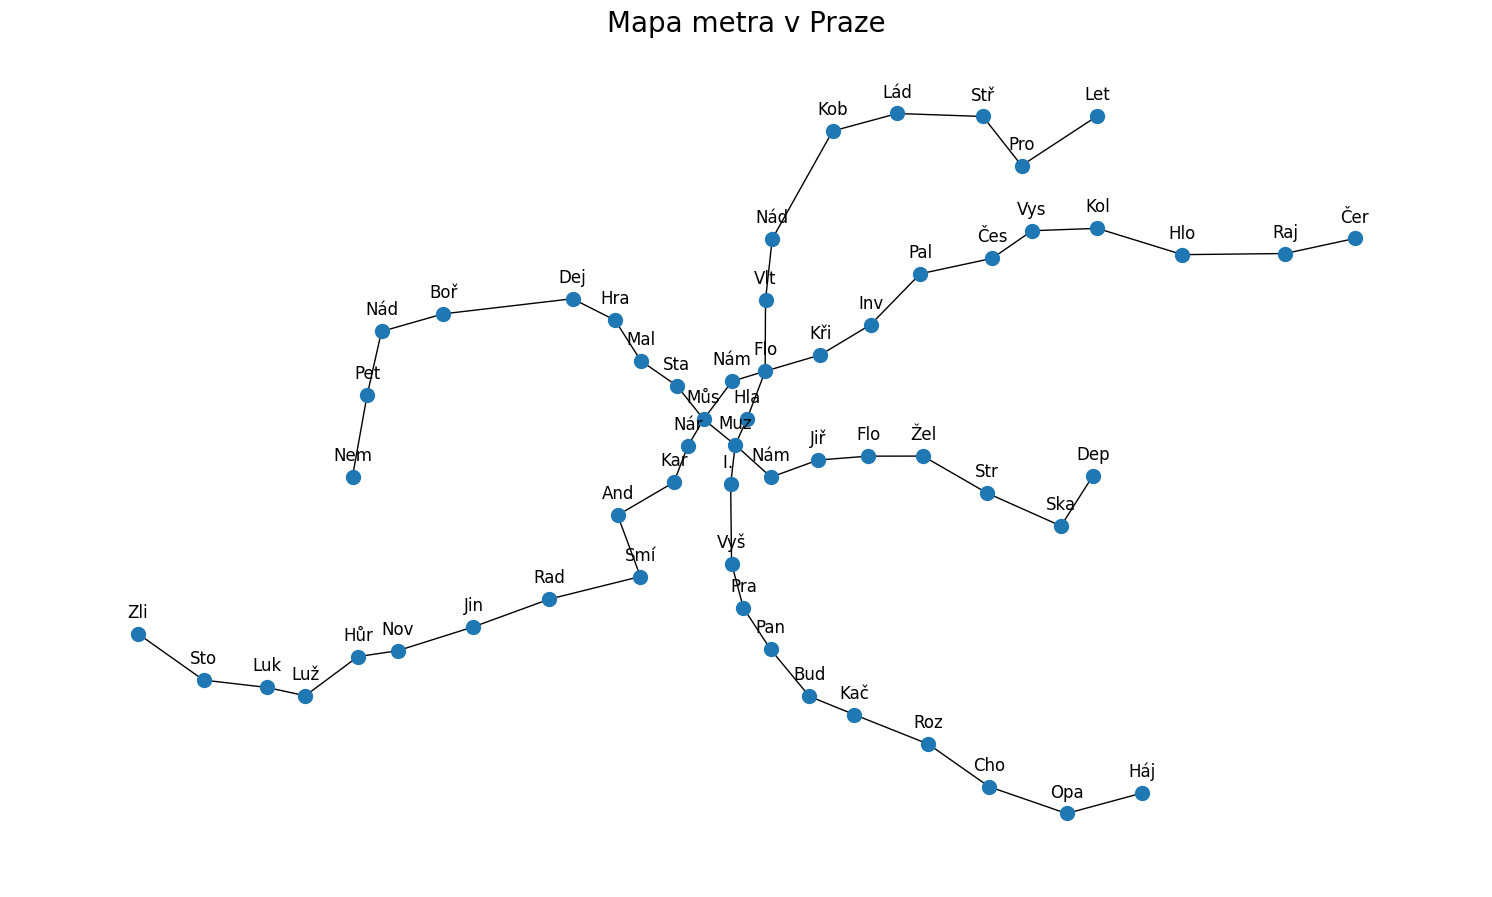

In [492]:
fig, ax = plt.subplots(figsize=(19, 11))
metro_pos_offset = { k: (v[0],v[1]+ 0.003) for k, v in metro_pos.items()}
metro_short = {k: k[:3] for k in metro_pos.keys()}
nx.draw(G, pos=metro_pos, node_size=100)
_ = nx.draw_networkx_labels(G, pos=metro_pos_offset, labels=metro_short)
plt.title("Mapa metra v Praze", fontsize=20)
_=_

Graf odpovídá realitě.